In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
filenames = [
              "./Reviews/ANUJA HOSPITAL/reviews.csv",
            ]

# merging two csv files
df = pd.concat(
    map(pd.read_csv, filenames), ignore_index=True)

print(len(df))
df

46


,Rating,Review
0,5 stars,This hospital is best which I've ever seen. Dr...
1,5 stars,Very good Hospital..very good facility and Ver...
2,5 stars,Dr. Rahul Birajdar is extremally talented doct...
3,5 stars,Dr Rahul Birajdar sir and The complete staff i...
4,5 stars,I have had a great experience with all my ailm...
5,5 stars,Thank you Dr. Suryakant and Dr.Rahul. Dr. Sury...
6,5 stars,Excellent hospital. Doctors are having in dept...
7,5 stars,Recently underwent covid treatment under Docto...
8,1 star,Treatment and medicine provided for kidney sto...
9,5 stars,Namrata mam is absolutely good.. She gives gen...


In [10]:
review_remove_translated = []

reviews_dict = df.to_dict('list')

for review in reviews_dict['Review']:
  review_sep = str(review).split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
  
  review_remove_translated.append(review)

In [11]:
reviews_dict['Review'] = review_remove_translated
df = pd.DataFrame(reviews_dict)
df

,Rating,Review
0,5 stars,This hospital is best which I've ever seen. Dr...
1,5 stars,Very good Hospital..very good facility and Ver...
2,5 stars,Dr. Rahul Birajdar is extremally talented doct...
3,5 stars,Dr Rahul Birajdar sir and The complete staff i...
4,5 stars,I have had a great experience with all my ailm...
5,5 stars,Thank you Dr. Suryakant and Dr.Rahul. Dr. Sury...
6,5 stars,Excellent hospital. Doctors are having in dept...
7,5 stars,Recently underwent covid treatment under Docto...
8,1 star,Treatment and medicine provided for kidney sto...
9,5 stars,Namrata mam is absolutely good.. She gives gen...


In [12]:
import string
import re

In [15]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['Review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['Rating'].map({"1 star":0, "2 stars":0, "3 stars":0, "4 stars":1, "5 stars":1})

In [16]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['Review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['Review'].apply(lambda x: count_punct(str(x)))
df

,Rating,Review,cleaned_review,label,review_len,punct
0,5 stars,This hospital is best which I've ever seen. Dr...,this hospital is best which i ve ever seen dr...,1,571,4.0
1,5 stars,Very good Hospital..very good facility and Ver...,very good hospital very good facility and ver...,1,271,4.8
2,5 stars,Dr. Rahul Birajdar is extremally talented doct...,dr rahul birajdar is extremally talented doct...,1,217,3.2
3,5 stars,Dr Rahul Birajdar sir and The complete staff i...,dr rahul birajdar sir and the complete staff i...,1,519,2.3
4,5 stars,I have had a great experience with all my ailm...,i have had a great experience with all my ailm...,1,190,4.7
5,5 stars,Thank you Dr. Suryakant and Dr.Rahul. Dr. Sury...,thank you dr suryakant and dr rahul dr sury...,1,237,4.2
6,5 stars,Excellent hospital. Doctors are having in dept...,excellent hospital doctors are having in dept...,1,180,2.2
7,5 stars,Recently underwent covid treatment under Docto...,recently underwent covid treatment under docto...,1,573,3.0
8,1 star,Treatment and medicine provided for kidney sto...,treatment and medicine provided for kidney sto...,0,135,2.2
9,5 stars,Namrata mam is absolutely good.. She gives gen...,namrata mam is absolutely good she gives gen...,1,100,6.0


In [17]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,Rating,Review,cleaned_review,label,review_len,punct,tokens
0,5 stars,This hospital is best which I've ever seen. Dr...,this hospital is best which i ve ever seen dr...,1,571,4.0,"[this, hospital, is, best, which, i, ve, ever,..."
1,5 stars,Very good Hospital..very good facility and Ver...,very good hospital very good facility and ver...,1,271,4.8,"[very, good, hospital, very, good, facility, a..."
2,5 stars,Dr. Rahul Birajdar is extremally talented doct...,dr rahul birajdar is extremally talented doct...,1,217,3.2,"[dr, rahul, birajdar, is, extremally, talented..."
3,5 stars,Dr Rahul Birajdar sir and The complete staff i...,dr rahul birajdar sir and the complete staff i...,1,519,2.3,"[dr, rahul, birajdar, sir, and, the, complete,..."
4,5 stars,I have had a great experience with all my ailm...,i have had a great experience with all my ailm...,1,190,4.7,"[i, have, had, a, great, experience, with, all..."


In [18]:
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [19]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,Rating,Review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5 stars,This hospital is best which I've ever seen. Dr...,this hospital is best which i ve ever seen dr...,1,571,4.0,"[this, hospital, is, best, which, i, ve, ever,...",hospital best ever seen dr rahul birajdar sir ...
1,5 stars,Very good Hospital..very good facility and Ver...,very good hospital very good facility and ver...,1,271,4.8,"[very, good, hospital, very, good, facility, a...",good hospital good facility good staff thank d...
2,5 stars,Dr. Rahul Birajdar is extremally talented doct...,dr rahul birajdar is extremally talented doct...,1,217,3.2,"[dr, rahul, birajdar, is, extremally, talented...",dr rahul birajdar extremally talented doctor t...
3,5 stars,Dr Rahul Birajdar sir and The complete staff i...,dr rahul birajdar sir and the complete staff i...,1,519,2.3,"[dr, rahul, birajdar, sir, and, the, complete,...",dr rahul birajdar sir complete staff anuja hos...
4,5 stars,I have had a great experience with all my ailm...,i have had a great experience with all my ailm...,1,190,4.7,"[i, have, had, a, great, experience, with, all...",great experience ailment best cure treatment p...


In [23]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")

Input data has 46 rows and 8 columns


Number of null in label: 0
Number of null in text: 0


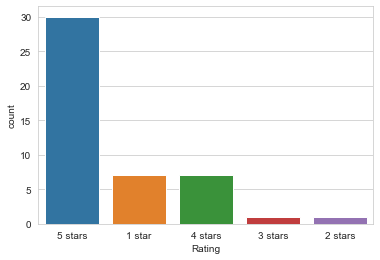

In [25]:
print(f"Number of null in label: { df['Rating'].isnull().sum() }")
print(f"Number of null in text: { df['Review'].isnull().sum() }")
sns.countplot(x='Rating', data=df);